In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.rc('font',family='Arial')
plt.rcParams.update({'font.size': 16})

In [2]:

Map = gpd.read_file('../data/map/province.shp')
Line=gpd.read_file(../data/map/china_nine_dotted_line.shp')
# Map.plot()
# plt.show()

In [30]:
print(type(Map), Map.head(5))

<class 'geopandas.geodataframe.GeoDataFrame'>          省     省代码    省类型                                           geometry
0      安徽省  340000      省  POLYGON ((116.42633 34.64000, 116.42607 34.638...
1  澳门特别行政区  820000  特别行政区  MULTIPOLYGON (((113.58117 22.19779, 113.57895 ...
2      北京市  110000    直辖市  POLYGON ((116.62585 41.05887, 116.62638 41.058...
3      福建省  350000      省  MULTIPOLYGON (((117.68877 23.53144, 117.68752 ...
4      甘肃省  620000      省  MULTIPOLYGON (((106.07129 35.44955, 106.07072 ...


In [3]:
testdata=pd.read_csv('../data/invest_after.csv')


C:\Users\19395\AppData\Local\Temp\ipykernel_13748\1249946629.py:1: DtypeWarning: Columns (9,12) have mixed types. Specify dtype option on import or set low_memory=False.
  testdata=pd.read_csv('../data/invest_after.csv')


In [4]:
company=testdata[['company_name','company_industry_code','company_area_code']]
invested_company=testdata[['invested_company_name','invested_company_industry_code','invested_company_area_code']]
company.columns=['company','industry_code','area_code']
invested_company.columns=['company','industry_code','area_code']
all_com=pd.concat([company,invested_company])
all_com=all_com.drop_duplicates(subset=['company']).reset_index()
lst=all_com['industry_code'].tolist()
lst=[i[:1] for i in lst]
all_com['industry_code']=lst
all_com

,index,company,industry_code,area_code
0,0,百色市红日房地产开发有限责任公司,K,451000
1,1,佛山市卓信房地产投资发展有限公司,K,440605
2,2,重庆绿色产业有限公司,A,500106
3,3,内蒙古风盛新能源有限公司,D,150105
4,4,四川诚翔服饰集团有限公司,F,510000
...,...,...,...,...
408316,323446,宁波中海海富房地产有限公司,K,330212
408317,323447,太原中海仲兴房地产开发有限公司,K,140100
408318,323448,北京安泰兴业置业有限公司,K,110107
408319,323449,北京中海地产有限公司,K,110228


# A

In [51]:
coma=all_com[all_com['industry_code']=='A']

In [52]:

area=coma['area_code'].tolist()
area=[str(j) for j in area]
for i in range(len(area)):
    area[i]=area[i][:2]
# print(area)
# sf=['京','津','冀','晋','蒙','辽','吉','黑','沪','苏','浙','皖','闽','赣','鲁','豫','鄂','湘','粤','桂','琼','渝','川','贵','滇','藏','陕','甘','青','宁','新']
sf=['BJ','TJ','HE','SX','NM','LN','JL','HL','SH','JS','ZJ','AH','FJ','JX','SD','HA','HB','HN','GD','GX','HI','CQ','SC','GZ','YN','XZ','SN','GS','QH','NX','XJ']
dm=[11,12,13,14,15,21,22,23,31,32,33,34,35,36,37,41,42,43,44,45,46,50,51,52,53,54,61,62,63,64,65]
dm=[str(j) for j in dm]
num_sf=[]
for i in dm:
    num_sf.append(area.count(i))

In [53]:
dm=[11,12,13,14,15,21,22,23,31,32,33,34,35,36,37,41,42,43,44,45,46,50,51,52,53,54,61,62,63,64,65]
dm=[i*10000 for i in dm]

In [54]:
Data=pd.DataFrame({'code':dm,'province':sf,'num':num_sf})
# Data

In [55]:
Data_with_Map = pd.merge(left=Map, right=Data, how='left',
                         left_on='省代码', right_on='code')
# Data_with_Map.plot(column='num', cmap='OrRd', legend=True,
#                    missing_kwds={
#                        "color": "grey",
#                        "edgecolor": "black",
#                        "hatch": ".",
#                        "alpha": 0.2
#                    })
# plt.show()

C:\Users\19395\anaconda3\lib\site-packages\geopandas\geodataframe.py:203: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  object.__setattr__(self, attr, val)


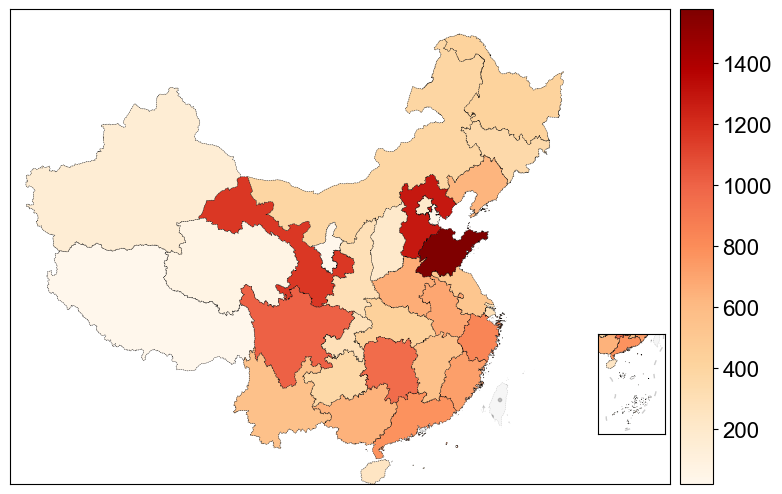

In [57]:
fig = plt.figure(figsize=(8,6))           
ax = fig.add_axes((0.05, 0.05, 0.9, 0.95))  

divider = make_axes_locatable(ax)                         
cax = divider.append_axes("right", size="5%", pad=0.1)

albers_proj = '+proj=aea +lat_1=25 +lat_2=47 +lon_0=105'  

ax = Data_with_Map.to_crs(albers_proj).plot(ax=ax,    
                                            cax=cax,  
                                            column='num',
                                            cmap='OrRd',
                                            edgecolor='black',  
                                            linewidth=0.3,      
                                            linestyle='--',     
                                            missing_kwds={
                                                "color": "lightgrey",
                                                "edgecolor": "black",
                                                "hatch": ".",
                                                "alpha": 0.2
                                            },
                                            legend=True)
                                            
bound = gpd.GeoDataFrame({          
    'x': [80, 150, 106.5, 123],
    'y': [15, 50, 2.8, 24.5]
})

bound.geometry = bound.apply(lambda row: Point(
    [row['x'], row['y']]), axis=1)  
bound.crs = 'EPSG:4326'  
bound.to_crs(albers_proj, inplace=True)  
bound


ax.set_xlim(bound.geometry[0].x, bound.geometry[1].x)
ax.set_ylim(bound.geometry[0].y, bound.geometry[1].y)

ax.set_xticks([])
ax.set_yticks([])


ax_child = fig.add_axes([0.7, 0.15, 0.2, 0.2])  
ax_child = Data_with_Map.to_crs(albers_proj).plot(ax=ax_child,   
                                                  column='num',
                                                  cmap='OrRd',
                                                  edgecolor='black',  
                                                  linewidth=0.3,      
                                                  linestyle='--',     
                                                  missing_kwds={
                                                      "color": "lightgrey",
                                                      "edgecolor": "black",
                                                      "hatch": ".",
                                                      "alpha": 0.2
                                                  })

ax_child = Line.geometry.to_crs(albers_proj).plot(ax=ax_child,  
                                                  edgecolor='grey',
                                                  linewidth=1,
                                                  alpha=0.4)
                                                  
ax_child.set_xlim(bound.geometry[2].x, bound.geometry[3].x)
ax_child.set_ylim(bound.geometry[2].y, bound.geometry[3].y)

ax_child.set_xticks([])
ax_child.set_yticks([])

plt.show()

# M

In [45]:
comm=all_com[all_com['industry_code']=='M']
area=comm['area_code'].tolist()
area=[str(j) for j in area]
for i in range(len(area)):
    area[i]=area[i][:2]
# print(area)
# sf=['京','津','冀','晋','蒙','辽','吉','黑','沪','苏','浙','皖','闽','赣','鲁','豫','鄂','湘','粤','桂','琼','渝','川','贵','滇','藏','陕','甘','青','宁','新']
sf=['BJ','TJ','HE','SX','NM','LN','JL','HL','SH','JS','ZJ','AH','FJ','JX','SD','HA','HB','HN','GD','GX','HI','CQ','SC','GZ','YN','XZ','SN','GS','QH','NX','XJ']
dm=[11,12,13,14,15,21,22,23,31,32,33,34,35,36,37,41,42,43,44,45,46,50,51,52,53,54,61,62,63,64,65]
dm=[str(j) for j in dm]
num_sf=[]
for i in dm:
    num_sf.append(area.count(i))

In [46]:
dm=[11,12,13,14,15,21,22,23,31,32,33,34,35,36,37,41,42,43,44,45,46,50,51,52,53,54,61,62,63,64,65]
dm=[i*10000 for i in dm]
Data=pd.DataFrame({'code':dm,'province':sf,'num':num_sf})
Data_with_Map = pd.merge(left=Map, right=Data, how='left',
                         left_on='省代码', right_on='code')

C:\Users\19395\anaconda3\lib\site-packages\geopandas\geodataframe.py:203: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  object.__setattr__(self, attr, val)


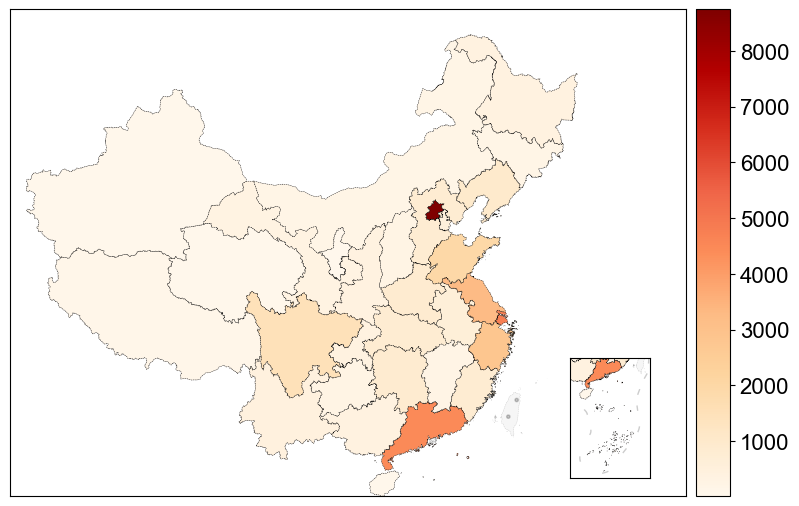

In [47]:
fig = plt.figure(figsize=(8,6))           
ax = fig.add_axes((0.05, 0.05, 0.9, 0.95)) 

divider = make_axes_locatable(ax)                        
cax = divider.append_axes("right", size="5%", pad=0.1)

albers_proj = '+proj=aea +lat_1=25 +lat_2=47 +lon_0=105' 

ax = Data_with_Map.to_crs(albers_proj).plot(ax=ax,   
                                            cax=cax,  
                                            column='num',
                                            cmap='OrRd',
                                            edgecolor='black',  
                                            linewidth=0.3,      
                                            linestyle='--',     
                                            missing_kwds={
                                                "color": "lightgrey",
                                                "edgecolor": "black",
                                                "hatch": ".",
                                                "alpha": 0.2
                                            },
                                            legend=True)
                                            
bound = gpd.GeoDataFrame({          
    'x': [80, 150, 106.5, 123],
    'y': [15, 50, 2.8, 24.5]
})

bound.geometry = bound.apply(lambda row: Point(
    [row['x'], row['y']]), axis=1) 
bound.crs = 'EPSG:4326'  
bound.to_crs(albers_proj, inplace=True) 
bound

ax.set_xlim(bound.geometry[0].x, bound.geometry[1].x)
ax.set_ylim(bound.geometry[0].y, bound.geometry[1].y)

ax.set_xticks([])
ax.set_yticks([])

ax_child = fig.add_axes([0.7, 0.15, 0.2, 0.2])  
ax_child = Data_with_Map.to_crs(albers_proj).plot(ax=ax_child,
                                                  column='num',
                                                  cmap='OrRd',
                                                  edgecolor='black',  
                                                  linewidth=0.3,      
                                                  linestyle='--',     
                                                  missing_kwds={
                                                      "color": "lightgrey",
                                                      "edgecolor": "black",
                                                      "hatch": ".",
                                                      "alpha": 0.2
                                                  })

ax_child = Line.geometry.to_crs(albers_proj).plot(ax=ax_child, 
                                                  edgecolor='grey',
                                                  linewidth=1,
                                                  alpha=0.4)
                                                  
ax_child.set_xlim(bound.geometry[2].x, bound.geometry[3].x)
ax_child.set_ylim(bound.geometry[2].y, bound.geometry[3].y)

ax_child.set_xticks([])
ax_child.set_yticks([])

plt.show()

# D

In [5]:
comd=all_com[all_com['industry_code']=='D']
area=comd['area_code'].tolist()
area=[str(j) for j in area]
for i in range(len(area)):
    area[i]=area[i][:2]
# print(area)
# sf=['京','津','冀','晋','蒙','辽','吉','黑','沪','苏','浙','皖','闽','赣','鲁','豫','鄂','湘','粤','桂','琼','渝','川','贵','滇','藏','陕','甘','青','宁','新']
sf=['BJ','TJ','HE','SX','NM','LN','JL','HL','SH','JS','ZJ','AH','FJ','JX','SD','HA','HB','HN','GD','GX','HI','CQ','SC','GZ','YN','XZ','SN','GS','QH','NX','XJ']
dm=[11,12,13,14,15,21,22,23,31,32,33,34,35,36,37,41,42,43,44,45,46,50,51,52,53,54,61,62,63,64,65]
dm=[str(j) for j in dm]
num_sf=[]
for i in dm:
    num_sf.append(area.count(i))

In [6]:
dm=[11,12,13,14,15,21,22,23,31,32,33,34,35,36,37,41,42,43,44,45,46,50,51,52,53,54,61,62,63,64,65]
dm=[i*10000 for i in dm]
Data=pd.DataFrame({'code':dm,'province':sf,'num':num_sf})
Data_with_Map = pd.merge(left=Map, right=Data, how='left',
                         left_on='省代码', right_on='code')

C:\Users\19395\anaconda3\lib\site-packages\geopandas\geodataframe.py:203: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  object.__setattr__(self, attr, val)


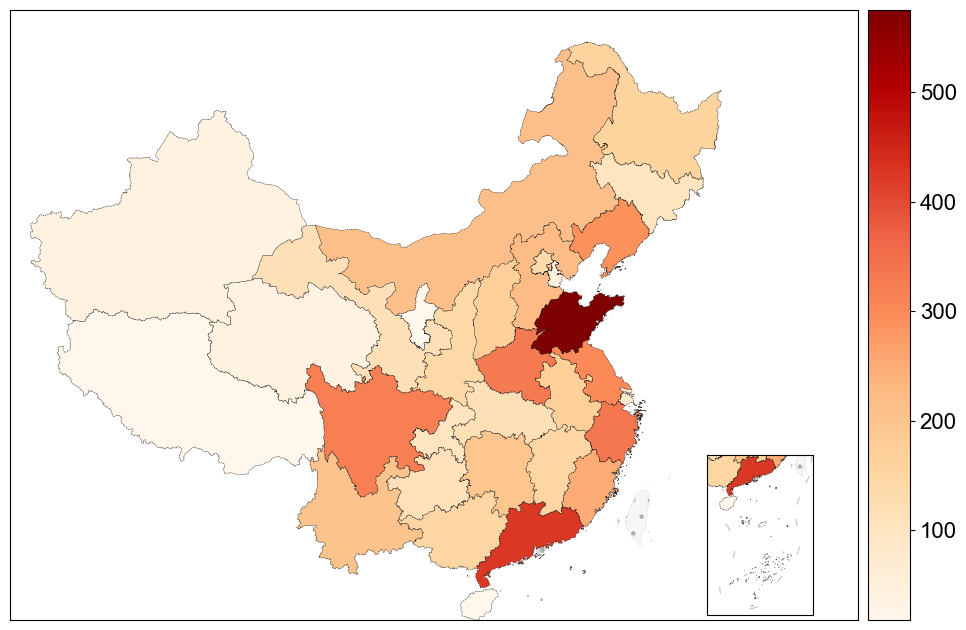

In [7]:
fig = plt.figure(figsize=(10, 8))          
ax = fig.add_axes((0.05, 0.05, 0.9, 0.95))  

divider = make_axes_locatable(ax)                       
cax = divider.append_axes("right", size="5%", pad=0.1)

albers_proj = '+proj=aea +lat_1=25 +lat_2=47 +lon_0=105'  

ax = Data_with_Map.to_crs(albers_proj).plot(ax=ax,   
                                            cax=cax, 
                                            column='num',
                                            cmap='OrRd',
                                            edgecolor='black', 
                                            linewidth=0.3,    
                                            linestyle='--',    
                                            missing_kwds={
                                                "color": "lightgrey",
                                                "edgecolor": "black",
                                                "hatch": ".",
                                                "alpha": 0.2
                                            },
                                            legend=True)
                                            
bound = gpd.GeoDataFrame({          
    'x': [80, 150, 106.5, 123],
    'y': [15, 50, 2.8, 24.5]
})

bound.geometry = bound.apply(lambda row: Point(
    [row['x'], row['y']]), axis=1)  
bound.crs = 'EPSG:4326' 
bound.to_crs(albers_proj, inplace=True)
bound

ax.set_xlim(bound.geometry[0].x, bound.geometry[1].x)
ax.set_ylim(bound.geometry[0].y, bound.geometry[1].y)

ax.set_xticks([])
ax.set_yticks([])

ax_child = fig.add_axes([0.7, 0.15, 0.2, 0.2])  
ax_child = Data_with_Map.to_crs(albers_proj).plot(ax=ax_child, 
                                                  column='num',
                                                  cmap='OrRd',
                                                  edgecolor='black',  
                                                  linewidth=0.3,      
                                                  linestyle='--',     
                                                  missing_kwds={
                                                      "color": "lightgrey",
                                                      "edgecolor": "black",
                                                      "hatch": ".",
                                                      "alpha": 0.2
                                                  })

ax_child = Line.geometry.to_crs(albers_proj).plot(ax=ax_child, 
                                                  edgecolor='grey',
                                                  linewidth=1,
                                                  alpha=0.4)
                                                  
ax_child.set_xlim(bound.geometry[2].x, bound.geometry[3].x)
ax_child.set_ylim(bound.geometry[2].y, bound.geometry[3].y)

ax_child.set_xticks([])
ax_child.set_yticks([])

plt.show()

# B

In [48]:
comb=all_com[all_com['industry_code']=='B']
area=comb['area_code'].tolist()
area=[str(j) for j in area]
for i in range(len(area)):
    area[i]=area[i][:2]
# print(area)
# sf=['京','津','冀','晋','蒙','辽','吉','黑','沪','苏','浙','皖','闽','赣','鲁','豫','鄂','湘','粤','桂','琼','渝','川','贵','滇','藏','陕','甘','青','宁','新']
sf=['BJ','TJ','HE','SX','NM','LN','JL','HL','SH','JS','ZJ','AH','FJ','JX','SD','HA','HB','HN','GD','GX','HI','CQ','SC','GZ','YN','XZ','SN','GS','QH','NX','XJ']
dm=[11,12,13,14,15,21,22,23,31,32,33,34,35,36,37,41,42,43,44,45,46,50,51,52,53,54,61,62,63,64,65]
dm=[str(j) for j in dm]
num_sf=[]
for i in dm:
    num_sf.append(area.count(i))

In [49]:
dm=[11,12,13,14,15,21,22,23,31,32,33,34,35,36,37,41,42,43,44,45,46,50,51,52,53,54,61,62,63,64,65]
dm=[i*10000 for i in dm]
Data=pd.DataFrame({'code':dm,'province':sf,'num':num_sf})
Data_with_Map = pd.merge(left=Map, right=Data, how='left',
                         left_on='省代码', right_on='code')

C:\Users\19395\anaconda3\lib\site-packages\geopandas\geodataframe.py:203: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  object.__setattr__(self, attr, val)


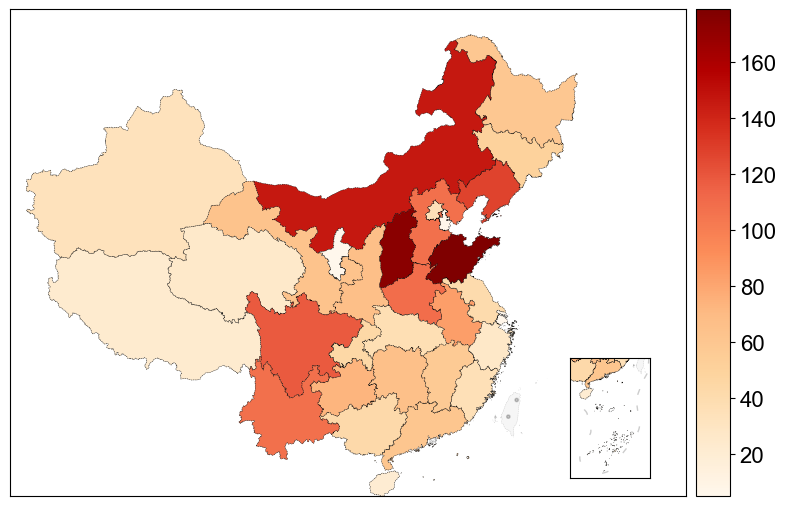

In [50]:
fig = plt.figure(figsize=(8,6))           
ax = fig.add_axes((0.05, 0.05, 0.9, 0.95))  

divider = make_axes_locatable(ax)                        
cax = divider.append_axes("right", size="5%", pad=0.1)

albers_proj = '+proj=aea +lat_1=25 +lat_2=47 +lon_0=105'

ax = Data_with_Map.to_crs(albers_proj).plot(ax=ax,  
                                            cax=cax, 
                                            column='num',
                                            cmap='OrRd',
                                            edgecolor='black', 
                                            linewidth=0.3,    
                                            linestyle='--',    
                                            missing_kwds={
                                                "color": "lightgrey",
                                                "edgecolor": "black",
                                                "hatch": ".",
                                                "alpha": 0.2
                                            },
                                            legend=True)
                                            
bound = gpd.GeoDataFrame({         
    'x': [80, 150, 106.5, 123],
    'y': [15, 50, 2.8, 24.5]
})

bound.geometry = bound.apply(lambda row: Point(
    [row['x'], row['y']]), axis=1) 
bound.crs = 'EPSG:4326' 
bound.to_crs(albers_proj, inplace=True) 
bound

ax.set_xlim(bound.geometry[0].x, bound.geometry[1].x)
ax.set_ylim(bound.geometry[0].y, bound.geometry[1].y)

ax.set_xticks([])
ax.set_yticks([])

ax_child = fig.add_axes([0.7, 0.15, 0.2, 0.2])  
ax_child = Data_with_Map.to_crs(albers_proj).plot(ax=ax_child,  
                                                  column='num',
                                                  cmap='OrRd',
                                                  edgecolor='black',  
                                                  linewidth=0.3,      
                                                  linestyle='--',     
                                                  missing_kwds={
                                                      "color": "lightgrey",
                                                      "edgecolor": "black",
                                                      "hatch": ".",
                                                      "alpha": 0.2
                                                  })

ax_child = Line.geometry.to_crs(albers_proj).plot(ax=ax_child,
                                                  edgecolor='grey',
                                                  linewidth=1,
                                                  alpha=0.4)
                                                  
ax_child.set_xlim(bound.geometry[2].x, bound.geometry[3].x)
ax_child.set_ylim(bound.geometry[2].y, bound.geometry[3].y)

ax_child.set_xticks([])
ax_child.set_yticks([])

plt.show()

# L

In [36]:
coml=all_com[all_com['industry_code']=='L']
area=coml['area_code'].tolist()
area=[str(j) for j in area]
for i in range(len(area)):
    area[i]=area[i][:2]
# print(area)
# sf=['京','津','冀','晋','蒙','辽','吉','黑','沪','苏','浙','皖','闽','赣','鲁','豫','鄂','湘','粤','桂','琼','渝','川','贵','滇','藏','陕','甘','青','宁','新']
sf=['BJ','TJ','HE','SX','NM','LN','JL','HL','SH','JS','ZJ','AH','FJ','JX','SD','HA','HB','HN','GD','GX','HI','CQ','SC','GZ','YN','XZ','SN','GS','QH','NX','XJ']
dm=[11,12,13,14,15,21,22,23,31,32,33,34,35,36,37,41,42,43,44,45,46,50,51,52,53,54,61,62,63,64,65]
dm=[str(j) for j in dm]
num_sf=[]
for i in dm:
    num_sf.append(area.count(i))

In [37]:
dm=[11,12,13,14,15,21,22,23,31,32,33,34,35,36,37,41,42,43,44,45,46,50,51,52,53,54,61,62,63,64,65]
dm=[i*10000 for i in dm]
Data=pd.DataFrame({'code':dm,'province':sf,'num':num_sf})
Data_with_Map = pd.merge(left=Map, right=Data, how='left',
                         left_on='省代码', right_on='code')

C:\Users\19395\anaconda3\lib\site-packages\geopandas\geodataframe.py:203: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  object.__setattr__(self, attr, val)


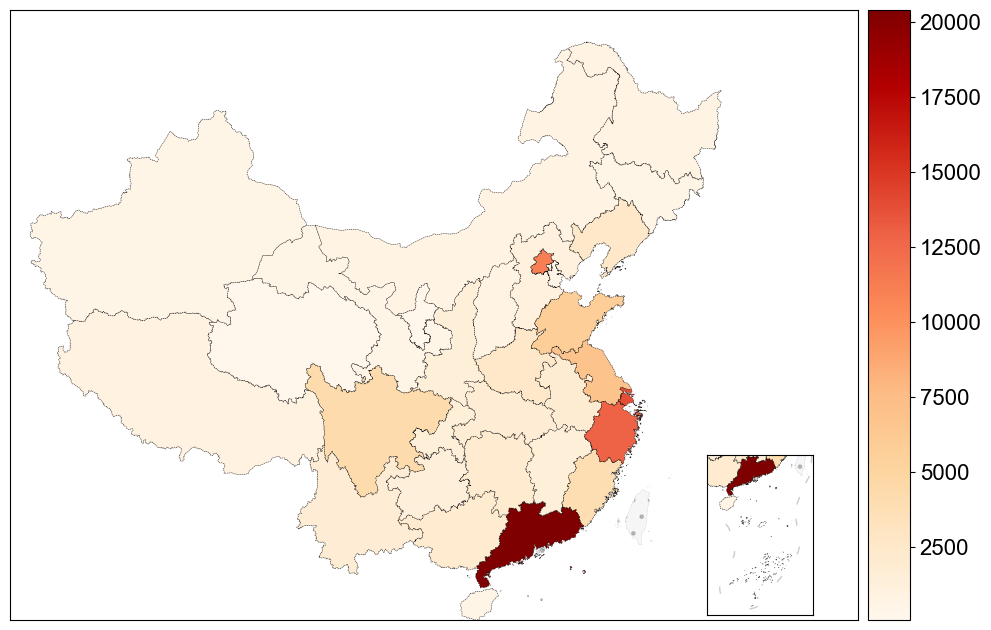

In [38]:
fig = plt.figure(figsize=(10, 8))          
ax = fig.add_axes((0.05, 0.05, 0.9, 0.95))  

divider = make_axes_locatable(ax)                       
cax = divider.append_axes("right", size="5%", pad=0.1)

albers_proj = '+proj=aea +lat_1=25 +lat_2=47 +lon_0=105'  

ax = Data_with_Map.to_crs(albers_proj).plot(ax=ax,    
                                            cax=cax,  
                                            column='num',
                                            cmap='OrRd',
                                            edgecolor='black',  
                                            linewidth=0.3,      
                                            linestyle='--',     
                                            missing_kwds={
                                                "color": "lightgrey",
                                                "edgecolor": "black",
                                                "hatch": ".",
                                                "alpha": 0.2
                                            },
                                            legend=True)
                                            
bound = gpd.GeoDataFrame({        
    'x': [80, 150, 106.5, 123],
    'y': [15, 50, 2.8, 24.5]
})

bound.geometry = bound.apply(lambda row: Point(
    [row['x'], row['y']]), axis=1)  
bound.crs = 'EPSG:4326'  
bound.to_crs(albers_proj, inplace=True)  
bound

ax.set_xlim(bound.geometry[0].x, bound.geometry[1].x)
ax.set_ylim(bound.geometry[0].y, bound.geometry[1].y)

ax.set_xticks([])
ax.set_yticks([])

ax_child = fig.add_axes([0.7, 0.15, 0.2, 0.2])  
ax_child = Data_with_Map.to_crs(albers_proj).plot(ax=ax_child,   
                                                  column='num',
                                                  cmap='OrRd',
                                                  edgecolor='black',  
                                                  linewidth=0.3,      
                                                  linestyle='--',     
                                                  missing_kwds={
                                                      "color": "lightgrey",
                                                      "edgecolor": "black",
                                                      "hatch": ".",
                                                      "alpha": 0.2
                                                  })

ax_child = Line.geometry.to_crs(albers_proj).plot(ax=ax_child,  
                                                  edgecolor='grey',
                                                  linewidth=1,
                                                  alpha=0.4)
                                                  
ax_child.set_xlim(bound.geometry[2].x, bound.geometry[3].x)
ax_child.set_ylim(bound.geometry[2].y, bound.geometry[3].y)

ax_child.set_xticks([])
ax_child.set_yticks([])

plt.show()